In [1]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=names)

C:\Users\S.SARATH\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\S.SARATH\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\S.SARATH\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
data = data.replace('?', pd.NaT)
data = data.fillna(data.mean())

# Convert categorical data to numerical data
data['sex'] = data['sex'].astype('category').cat.codes
data['cp'] = data['cp'].astype('category').cat.codes
data['fbs'] = data['fbs'].astype('category').cat.codes
data['restecg'] = data['restecg'].astype('category').cat.codes
data['exang'] = data['exang'].astype('category').cat.codes
data['slope'] = data['slope'].astype('category').cat.codes
data['ca'] = data['ca'].astype('category').cat.codes
data['thal'] = data['thal'].astype('category').cat.codes

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,0,145.0,233.0,1,2,150.0,0,2.3,2,0,1,0
1,67.0,1,3,160.0,286.0,0,2,108.0,1,1.5,1,3,0,2
2,67.0,1,3,120.0,229.0,0,2,129.0,1,2.6,1,2,2,1
3,37.0,1,2,130.0,250.0,0,0,187.0,0,3.5,2,0,0,0
4,41.0,0,1,130.0,204.0,0,2,172.0,0,1.4,0,0,0,0


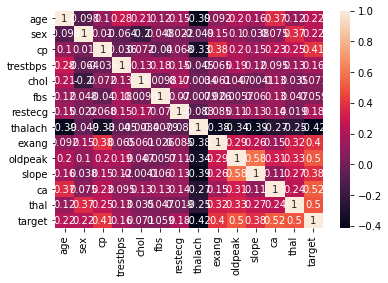

In [5]:
import numpy as np
import seaborn as sns

# Correlation matrix
corr = data.corr()

# Heatmap of correlation matrix
sns.heatmap(corr, annot=True)

# Select features with highest correlation with target variable
selected_features = np.abs(corr['target']).sort_values(ascending=False).head(5).index.tolist()


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data[selected_features]
y = data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train random forest classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9836065573770492


In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate model performance using classification report, confusion matrix, and accuracy score
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         9
           3       0.88      1.00      0.93         7
           4       1.00      0.75      0.86         4

    accuracy                           0.98        61
   macro avg       0.97      0.95      0.96        61
weighted avg       0.99      0.98      0.98        61

Confusion Matrix:
 [[29  0  0  0  0]
 [ 0 12  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  1  3]]
Accuracy: 0.9836065573770492


In [9]:
import pickle


In [10]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [11]:
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)
